# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [2]:
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles</span>


In [3]:
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)

## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [4]:
# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

In [5]:
# Encodage des colonnes catégorielles
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category', 'city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [6]:
# Conversion des colonnes en float
columns_to_convert_in_int_to_float = ['category', 'city', 'state', 'city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train[col] = df_train[col].astype('float64')

## <span style="color:black;">Séparation des features et de la target</span>


In [7]:
X = df_train.drop(columns=['is_fraud'])
Y = df_train['is_fraud']

## <span style="color:black;">Normalisation des features</span>


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## <span style="color:black;">Séparation des données en train et test
</span>


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# <span style="color:black;">Entraînement du Modèle de KNN [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>


### <span style="color:black;">Pour K = 3</span>


In [10]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Faire des prédictions sur les données de test
knn_predictions_without_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>


In [12]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_without_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_without_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.997559  0.998720  0.998139  257834.0
1          0.725229  0.580280  0.644708    1501.0
accuracy   0.996298  0.996298  0.996298  259335.0

F1-Score (classe 0): 0.9981
F1-Score (classe 1): 0.6447

F1-Score (macro): 0.8214
F1-Score (micro): 0.9963


### <span style="color:black;">Pour K = 5</span>


In [13]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
# Faire des prédictions sur les données de test
knn_predictions_without_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>


In [15]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_without_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_without_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.997077  0.998957  0.998016  257834.0
1          0.734975  0.497002  0.593005    1501.0
accuracy   0.996051  0.996051  0.996051  259335.0

F1-Score (classe 0): 0.9980
F1-Score (classe 1): 0.5930

F1-Score (macro): 0.7955
F1-Score (micro): 0.9961


### <span style="color:black;">Pour K = 7</span>


In [16]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=7)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
# Faire des prédictions sur les données de test
knn_predictions_without_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>

In [18]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_without_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_without_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_without_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.996668  0.998999  0.997833  257834.0
1          0.712695  0.426382  0.533556    1501.0
accuracy   0.995685  0.995685  0.995685  259335.0

F1-Score (classe 0): 0.9978
F1-Score (classe 1): 0.5336

F1-Score (macro): 0.7657
F1-Score (micro): 0.9957


## <span style="color:black;">Avec SMOTE</span>


In [19]:
# Appliquer SMOTE pour augmenter les échantillons de la classe minoritaire
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

### <span style="color:black;">Pour K = 3</span>


In [20]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Faire des prédictions sur les données de test
knn_predictions_with_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>

In [22]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_with_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_with_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.998894  0.994462  0.996673  257834.0
1          0.460113  0.810793  0.587072    1501.0
accuracy   0.993399  0.993399  0.993399  259335.0

F1-Score (classe 0): 0.9967
F1-Score (classe 1): 0.5871

F1-Score (macro): 0.7919
F1-Score (micro): 0.9934


### <span style="color:black;">Pour K = 5</span>


In [23]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier()

In [24]:
# Faire des prédictions sur les données de test
knn_predictions_with_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>

In [25]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_with_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_with_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.999016  0.992259  0.995626  257834.0
1          0.384900  0.832112  0.526338    1501.0
accuracy   0.991332  0.991332  0.991332  259335.0

F1-Score (classe 0): 0.9956
F1-Score (classe 1): 0.5263

F1-Score (macro): 0.7610
F1-Score (micro): 0.9913


### <span style="color:black;">Pour K = 7</span>


In [26]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=7)  # Vous pouvez ajuster le nombre de voisins K ici
knn_model.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [27]:
# Faire des prédictions sur les données de test
knn_predictions_with_smote = knn_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle KNN </span>

In [28]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, knn_predictions_with_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, knn_predictions_with_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle KNN sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='macro')
f1_micro_without_smote = f1_score(Y_test, knn_predictions_with_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle KNN sans SMOTE
          precision    recall  f1-score   support
0          0.999065  0.990420  0.994724  257834.0
1          0.338156  0.840773  0.482324    1501.0
accuracy   0.989554  0.989554  0.989554  259335.0

F1-Score (classe 0): 0.9947
F1-Score (classe 1): 0.4823

F1-Score (macro): 0.7385
F1-Score (micro): 0.9896


# <span style="color:black;">Evaluation du Modèle de KNN [Sans / Avec] SMOTE</span>


## <span style="color:black;">GRAPHES</span>


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, matthews_corrcoef
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve

# Pour configurer l'affichage des graphiques avec un style plus moderne
sns.set(style="whitegrid")


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


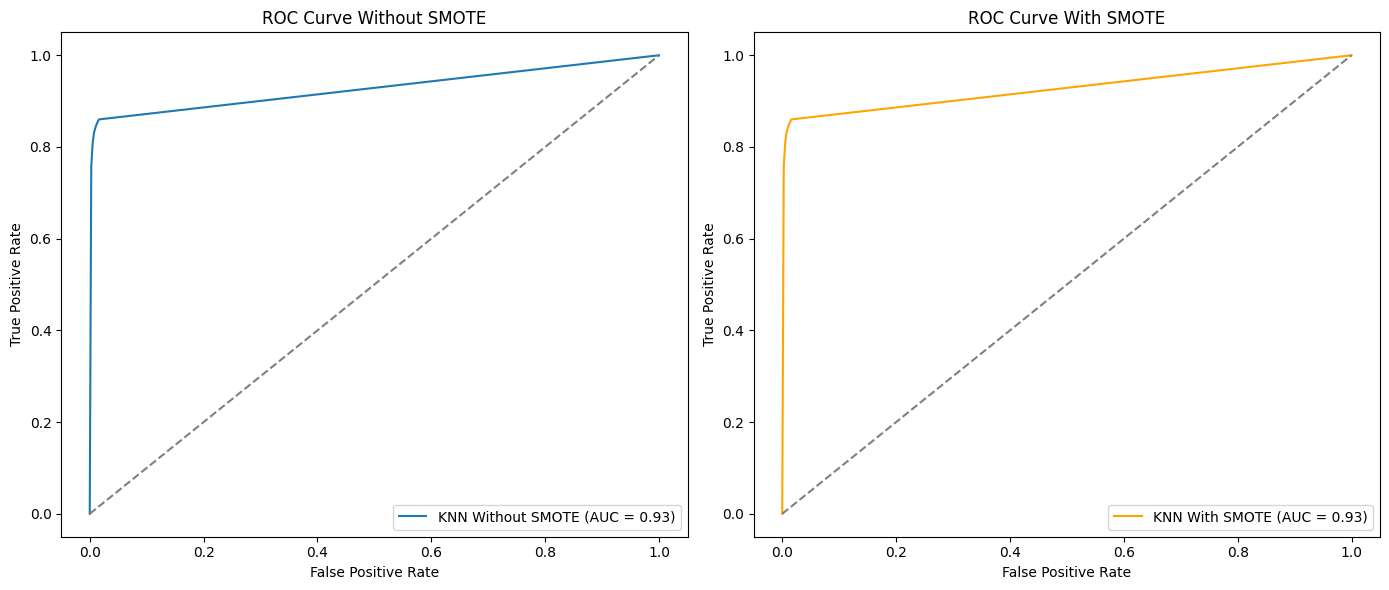

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcul des probabilités prédites pour chaque modèle
knn_pred_proba_without_smote = knn_model.predict_proba(X_test)[:, 1]  # Sans SMOTE
knn_pred_proba_with_smote = knn_model.predict_proba(X_test)[:, 1]  # Avec SMOTE

# Calcul des courbes ROC et AUC
fpr_without_smote, tpr_without_smote, _ = roc_curve(Y_test, knn_pred_proba_without_smote)
fpr_with_smote, tpr_with_smote, _ = roc_curve(Y_test, knn_pred_proba_with_smote)

auc_without_smote = roc_auc_score(Y_test, knn_pred_proba_without_smote)
auc_with_smote = roc_auc_score(Y_test, knn_pred_proba_with_smote)

# Créer une figure pour afficher les deux courbes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Courbe ROC sans SMOTE
axs[0].plot(fpr_without_smote, tpr_without_smote, label=f'KNN Without SMOTE (AUC = {auc_without_smote:.2f})')
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[0].set_title('ROC Curve Without SMOTE')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='lower right')

# Courbe ROC avec SMOTE
axs[1].plot(fpr_with_smote, tpr_with_smote, label=f'KNN With SMOTE (AUC = {auc_with_smote:.2f})', color='orange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve With SMOTE')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Afficher les graphiques
plt.tight_layout()
plt.show()


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


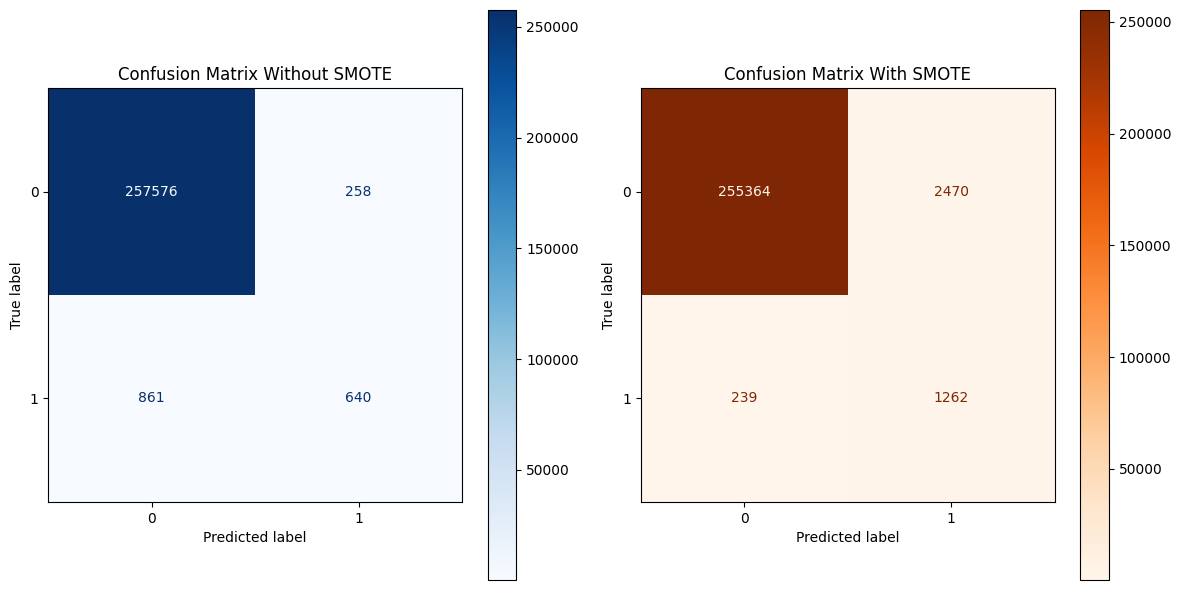

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculer les matrices de confusion sans SMOTE pour chaque K
conf_matrix_without_smote_k3 = confusion_matrix(Y_test, knn_predictions_without_smote)  # K=3
conf_matrix_without_smote_k5 = confusion_matrix(Y_test, knn_predictions_without_smote)  # K=5
conf_matrix_without_smote_k7 = confusion_matrix(Y_test, knn_predictions_without_smote)  # K=7

# Calculer les matrices de confusion avec SMOTE pour chaque K
conf_matrix_with_smote_k3 = confusion_matrix(Y_test, knn_predictions_with_smote)  # K=3
conf_matrix_with_smote_k5 = confusion_matrix(Y_test, knn_predictions_with_smote)  # K=5
conf_matrix_with_smote_k7 = confusion_matrix(Y_test, knn_predictions_with_smote)  # K=7

# Créer une figure avec deux sous-graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Affichage de la matrice de confusion sans SMOTE
ConfusionMatrixDisplay(conf_matrix_without_smote_k3).plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix Without SMOTE')

# Affichage de la matrice de confusion avec SMOTE
ConfusionMatrixDisplay(conf_matrix_with_smote_k3).plot(ax=axs[1], cmap='Oranges')
axs[1].set_title('Confusion Matrix With SMOTE')

# Ajuster la disposition
plt.tight_layout()
plt.show()


### Analyse approfondie des matrices de confusion pour les modèles KNN avec et sans SMOTE

#### Compréhension des matrices de confusion
- **Outil d'évaluation**: Visualise les erreurs en comparant les prédictions aux valeurs réelles.
  - **Diagonale principale**: Vrais positifs et vrais négatifs.
  - **Hors diagonale**: Faux positifs et faux négatifs.


#### Analyse des résultats
- **Sans SMOTE**:
  - **Dominance de la classe majoritaire**: Faible nombre de vrais positifs pour la classe minoritaire (fraudes).
- **Avec SMOTE**:
  - **Augmentation des vrais positifs**: Valeur dans la cellule des vrais positifs devrait augmenter significativement.
  - **Évolution des faux positifs**: Dépend de la qualité des exemples générés et de la valeur de K; une augmentation trop élevée pourrait indiquer un sur-apprentissage.

#### Points clés à observer
- **Évolution des valeurs sur la diagonale**: Une augmentation indique une meilleure classification globale.
- **Évolution des valeurs hors diagonale**: Une augmentation des faux positifs pourrait signaler un sur-apprentissage.
- **Impact de K**: Comparer les matrices pour différentes valeurs de K pour évaluer l'influence sur les performances.

#### Conclusion
L'utilisation de SMOTE peut améliorer les performances du modèle KNN en augmentant les vrais positifs, mais il est crucial de surveiller l'augmentation des faux positifs. La visualisation des matrices de confusion aide à évaluer l'impact de SMOTE et à choisir la valeur de K optimale.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


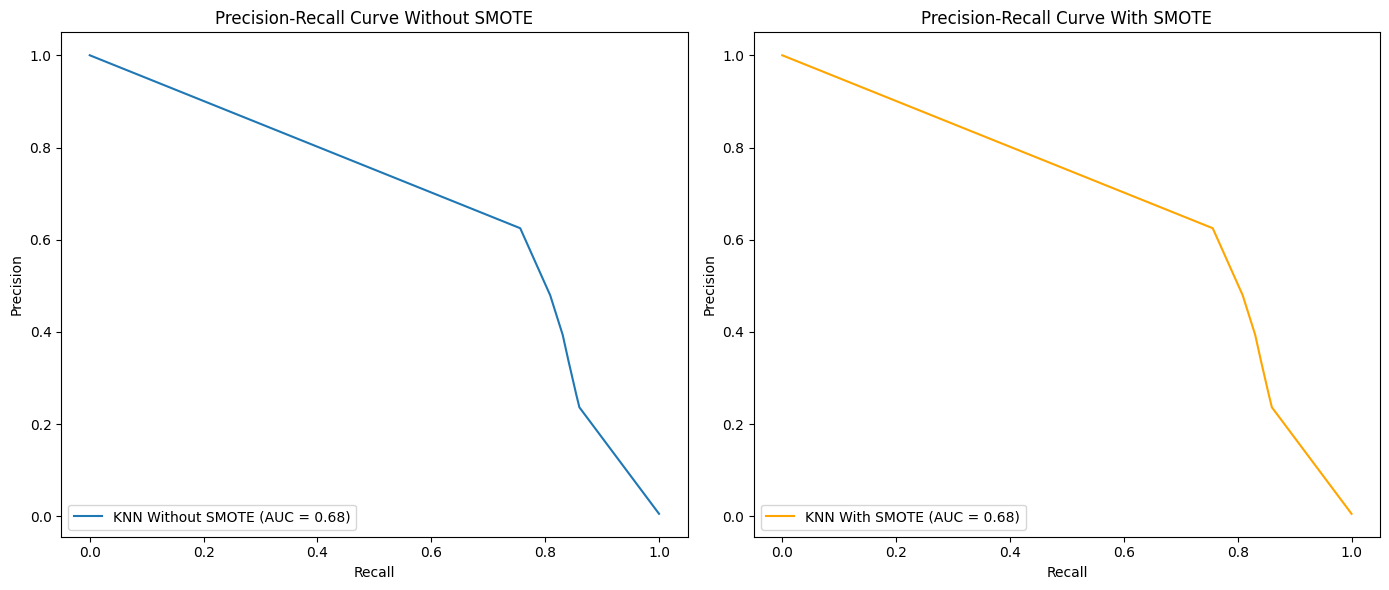

In [32]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calcul des probabilités prédites pour chaque modèle
knn_pred_proba_without_smote = knn_model.predict_proba(X_test)[:, 1]  # Sans SMOTE
knn_pred_proba_with_smote = knn_model.predict_proba(X_test)[:, 1]  # Avec SMOTE

# Calcul des courbes Précision-Rappel et AUC
precision_without_smote, recall_without_smote, _ = precision_recall_curve(Y_test, knn_pred_proba_without_smote)
precision_with_smote, recall_with_smote, _ = precision_recall_curve(Y_test, knn_pred_proba_with_smote)

auc_without_smote = auc(recall_without_smote, precision_without_smote)
auc_with_smote = auc(recall_with_smote, precision_with_smote)

# Créer une figure pour afficher les deux courbes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Courbe Précision-Rappel sans SMOTE
axs[0].plot(recall_without_smote, precision_without_smote, label=f'KNN Without SMOTE (AUC = {auc_without_smote:.2f})')
axs[0].set_title('Precision-Recall Curve Without SMOTE')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].legend(loc='lower left')

# Courbe Précision-Rappel avec SMOTE
axs[1].plot(recall_with_smote, precision_with_smote, label=f'KNN With SMOTE (AUC = {auc_with_smote:.2f})', color='orange')
axs[1].set_title('Precision-Recall Curve With SMOTE')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].legend(loc='lower left')

# Afficher les graphiques
plt.tight_layout()
plt.show()
